# Installations and connect to drive

In [1]:
!pip install scikit-misc
!pip install umap-learn igraph
!pip install anndata
!pip install scanpy
!pip install 'scanpy[leiden]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=5616bcd85383b0691be40a8a3355b4b0c5657be135f06755140cbc901c65ad83
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.7 MB/s eta 0:00:00


In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread
import random
import umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import scipy.sparse
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
import numpy as np
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
extract_dir = "/content/drive/MyDrive/F2024/Applied Data Science/Project 1/Frogtail_files/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Upload Data

In [4]:
adata = sc.read_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


# Visualization
> Visualize the data prior to any further analysis

In [5]:
# creating the categories colored in the paper for visual comparison

cluster_to_category = {
    'Erythrocyte 4': 'Red Blood Cells',
    'Myeloid 1': 'Immune',
    'Beta ionocyte': 'Somite and Others',
    'Goblet cell': 'Somite and Others',
    'Erythrocyte 1': 'Red Blood Cells',
    'Epidermis': 'Skin',
    'Sclerotome': 'Somite and Others',
    'Myotome': 'Somite and Others',
    'Spinal cord progenitor': 'Neural',
    'Myeloid 2': 'Immune',
    'Mesenchyme': 'Somite and Others',
    'ROCs': 'Somite and Others',
    'Melanocyte': 'Skin',
    'Erythrocyte 3': 'Red Blood Cells',
    'Differentiating neuron': 'Neural',
    'Satellite cell': 'Somite and Others',
    'Vascular endothelial cell': 'Somite and Others',
    'Vulnerable Motor Neuron': 'Neural',
    'Alpha ionocyte': 'Somite and Others',
    'Lymphoid 1 (Gata2-, Gata3+)': 'Immune',
    'Lymphoid 2 (Cxcr6+)': 'Immune',
    'Erythrocyte 2': 'Red Blood Cells',
    'Interneuron 1': 'Neural',
    'Skeletal muscle': 'Somite and Others',
    'Lymphoid 4 (Gata2+, Gata3-)': 'Immune',
    'Small secretory cell': 'Somite and Others',
    'Floor plate': 'Neural',
    'Dermomyotome': 'Somite and Others',
    'Interneuron 2': 'Neural',
    'Dopaminergic neurons': 'Neural',
    'Lymphoid 5 (CD19+)': 'Immune',
    'Interneuron 4': 'Neural',
    'Melanocyte stem cell': 'Skin',
    'laminin-rich epidermis': 'Skin',
    'Motor neuron (leptin+)': 'Neural',
    'Motor neuron': 'Neural',
    'Lymphoid 3': 'Immune',
    'Posterior notochord': 'Neural',
    'Melanocyte precursor': 'Skin',
    'Anterior notochord': 'Neural',
    'Interneuron 3': 'Neural',
    'Smooth muscle': 'Somite and Others',
    'Syndetome': 'Somite and Others',
    'Differentiating myocyte': 'Somite and Others',
    'Oligodendrocyte': 'Neural',
    'Lymphoid endothelial cells': 'Immune'
}

adata.obs['cell_type_category'] = adata.obs['cluster'].map(cluster_to_category)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


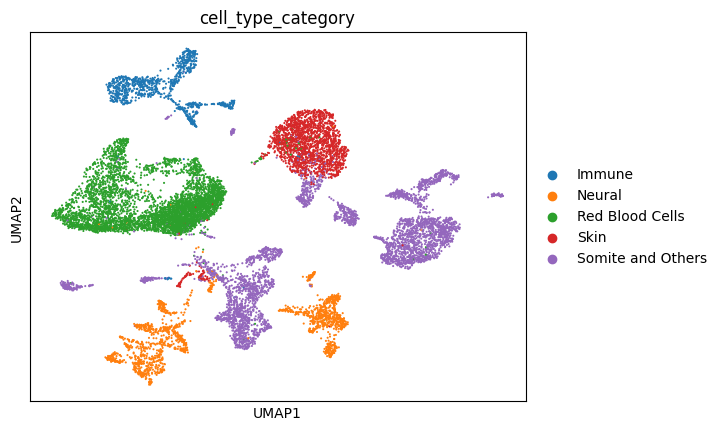

In [6]:
# normalize data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# choose highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=0.8, min_disp=0.65)
adata = adata[:, adata.var.highly_variable]

# scale the data (mean = 0, variance = 1)
sc.pp.scale(adata, max_value=10)

# compute PCA
sc.tl.pca(adata, svd_solver='arpack')

# compute nearest neighbors using the PCA representation
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=50)

# run UMAP
sc.tl.umap(adata)

# plot UMAP colored by 'cell_type_category'
sc.pl.umap(adata, color=['cell_type_category'])


In [120]:
sc.pl.umap(adata, color=['cluster'])

KeyboardInterrupt: 

# Clustering

> Three different methods of clustering the data: Leiden, Kmeans, Hierarchical

## 1. PCA + Leiden

In [8]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
sc.tl.leiden(adata, resolution=1.0)

<ipython-input-8-034b52f9600c>:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1.0)


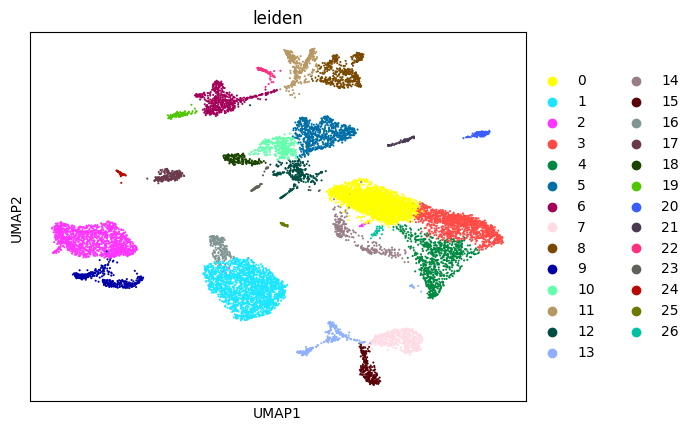

In [ ]:
sc.tl.umap(adata)

sc.pl.umap(adata, color=['leiden'])

## 2. kMeans

In [47]:
kmeans = KMeans(n_clusters=36, random_state=0)
adata.obs['kmeans'] = kmeans.fit_predict(adata.obsm['X_pca'])
adata.obs['kmeans'] = adata.obs['kmeans'].astype('category')

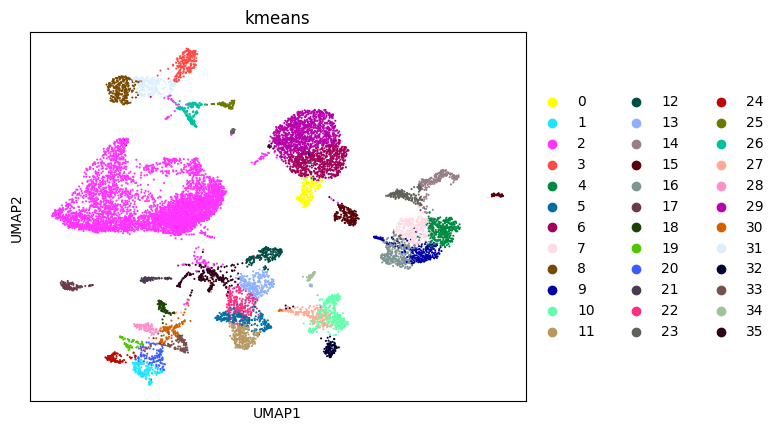

In [ ]:
sc.pl.umap(adata, color=['kmeans'])

## 3. Heirarchical Clustering

In [50]:
hierarchical = AgglomerativeClustering(n_clusters=36)
adata.obs['hierarchical'] = hierarchical.fit_predict(adata.obsm['X_pca'])

In [51]:
adata.obs['hierarchical'] = adata.obs['hierarchical'].astype('category')

In [ ]:
sc.tl.umap(adata)

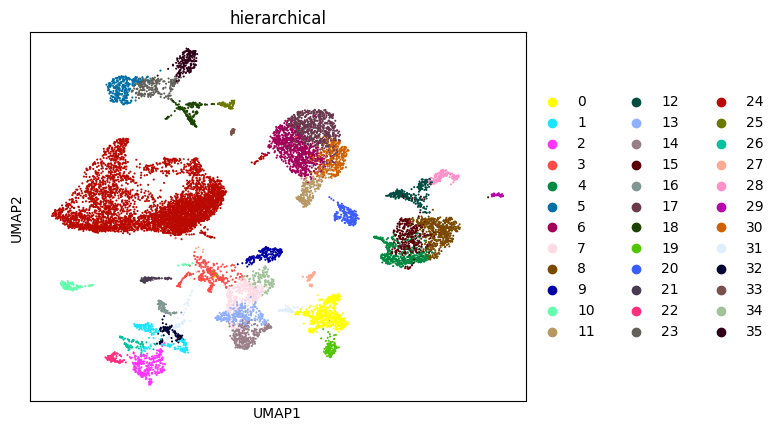

In [ ]:
sc.pl.umap(adata, color=['hierarchical'])

## Cluster Metrics

> If a ground truth is required for the metric, we use the clusters provided in the original data.



In [52]:
true_labels = adata.obs['cluster']
umap_embedding = adata.obsm['X_umap']

silhouette_kmeans = silhouette_score(umap_embedding, adata.obs['kmeans'])
silhouette_hierarchical = silhouette_score(umap_embedding, adata.obs['hierarchical'])
silhouette_leiden = silhouette_score(umap_embedding, adata.obs['leiden'])

ari_kmeans = adjusted_rand_score(true_labels, adata.obs['kmeans'])
ari_hierarchical = adjusted_rand_score(true_labels, adata.obs['hierarchical'])
ari_leiden = adjusted_rand_score(true_labels, adata.obs['leiden'])

rand_kmeans = rand_score(true_labels, adata.obs['kmeans'])
rand_hierarchical = rand_score(true_labels, adata.obs['hierarchical'])
rand_leiden = rand_score(true_labels, adata.obs['leiden'])

print("Silhouette Scores:")
print(f"K-means: {silhouette_kmeans}")
print(f"Hierarchical: {silhouette_hierarchical}")
print(f"Leiden: {silhouette_leiden}")

print("\nAdjusted Rand Index (ARI):")
print(f"K-means: {ari_kmeans}")
print(f"Hierarchical: {ari_hierarchical}")
print(f"Leiden: {ari_leiden}")

print("\nRand Index:")
print(f"K-means: {rand_kmeans}")
print(f"Hierarchical: {rand_hierarchical}")
print(f"Leiden: {rand_leiden}")

Silhouette Scores:
K-means: 0.3147960901260376
Hierarchical: 0.3144712448120117
Leiden: 0.4102480709552765

Adjusted Rand Index (ARI):
K-means: 0.48833930624272154
Hierarchical: 0.49407074188189865
Leiden: 0.6946256132219794

Rand Index:
K-means: 0.885081034428382
Hierarchical: 0.8892272246306298
Leiden: 0.9482540574160099


# Identify the cluster corresponding to ROCs

In [11]:
leiden_df = adata.obs.copy()

In [22]:
leiden_st40_dpa1 = leiden_df[(leiden_df['DevelopmentalStage'] == 'st40') &
                             (leiden_df['DaysPostAmputation'] == 1)]['leiden'].unique()

leiden_st46_dpa1 = leiden_df[(leiden_df['DevelopmentalStage'] == 'st46') &
                             (leiden_df['DaysPostAmputation'] == 1)]['leiden'].unique()

set_st40_dpa1 = set(leiden_st40_dpa1)
set_st46_dpa1 = set(leiden_st46_dpa1)
unique_st40_dpa1 = set_st40_dpa1 - (set_st46_dpa1)

print("Cluster present in regenerative frogs but not non-regenerative frogs 1 dpa:", unique_st40_dpa1)

Values in 'st40 and DPA1' but not in any other category: {'9'}


# Gene Markers

In [84]:
# Leiden, Wilcoxon

sc.tl.rank_genes_groups(adata, groupby='leiden', groups=['9'], n_genes=50, reference='rest',method='wilcoxon')
marker_genes_LW = adata.uns['rank_genes_groups']
genes_LW = list(marker_genes_LW['names'])
genes_LW_Str = [str(item[0]) for item in genes_LW]
stripped_LW = [gene.split('.')[0] for gene in genes_LW_Str]

In [85]:
# ROC, Wilcoxon

sc.tl.rank_genes_groups(adata, groupby='cluster', groups=['ROCs'], n_genes=50, reference='rest',method='wilcoxon')
marker_genes_RW = adata.uns['rank_genes_groups']
genes_RW = list(marker_genes_RW['names'])
genes_RW_Str = [str(item[0]) for item in genes_RW]
stripped_RW = [gene.split('.')[0] for gene in genes_RW_Str]

In [81]:
# Leiden, t-test

sc.tl.rank_genes_groups(adata, groupby='leiden', groups=['9'], n_genes=50, reference='rest',method='t-test')
marker_genes_LT = adata.uns['rank_genes_groups']
genes_LT = list(marker_genes_LT['names'])
genes_LT_Str = [str(item[0]) for item in genes_LT]
stripped_LT = [gene.split('.')[0] for gene in genes_LT_Str]

In [86]:
# ROC, t-test

sc.tl.rank_genes_groups(adata, groupby='cluster', groups=['ROCs'], n_genes=50, reference='rest',method='t-test')
marker_genes_RT = adata.uns['rank_genes_groups']
genes_RT = list(marker_genes_RT['names'])
genes_RT_Str = [str(item[0]) for item in genes_RT]
stripped_RT = [gene.split('.')[0] for gene in genes_RT_Str]

In [71]:
ROC_paper_list = set(['wnt5a','loc100488523','loc100492954','egfl6','lpar3','cpa6','sp9','fgf9','fbn2','tinagl1','fgf7','vwde','lef1','lamb2','fgfr4','fgf7','rspo2','cpa6','loc100498358','krt','loc100486832','jag1','Xelaev18043128m','dlx2','tp73','gdf6','Xelaev18046800m','nid2','igfbp2','ism2','dlx2','loc100493805','frem2','Xelaev18044182m','bmp5','tspear','sema3f','robo4','jchain','rspo2','adamts18','pltp','Xelaev18034799m','lamb1','lamb1','unc5b','mmp28','fgf10','pzp','galnt15'])

In [87]:
common_genes_RT = set(stripped_RT).intersection(ROC_paper_list)
common_genes_LT = set(stripped_LT).intersection(ROC_paper_list)
common_genes_RW = set(stripped_RW).intersection(ROC_paper_list)
common_genes_LW = set(stripped_LW).intersection(ROC_paper_list)

In [88]:
print(common_genes_LT)
print(common_genes_LW)
print(common_genes_RT)
print(common_genes_RW)

{'lpar3', 'igfbp2', 'vwde', 'pltp', 'frem2', 'unc5b', 'fgf9', 'nid2', 'egfl6'}
{'lpar3', 'igfbp2', 'vwde', 'pltp', 'frem2', 'unc5b', 'fgf9', 'nid2', 'egfl6'}
{'lpar3', 'igfbp2', 'vwde', 'pltp', 'frem2', 'unc5b', 'fgf9', 'nid2', 'egfl6'}
{'lpar3', 'igfbp2', 'vwde', 'pltp', 'frem2', 'unc5b', 'fgf9', 'nid2', 'egfl6'}


In [90]:
common_genesLTRT = set(genes_LT_Str).intersection(set(genes_RT_Str))
print(common_genesLTRT)

50


<ipython-input-119-07d6e2c85f69>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


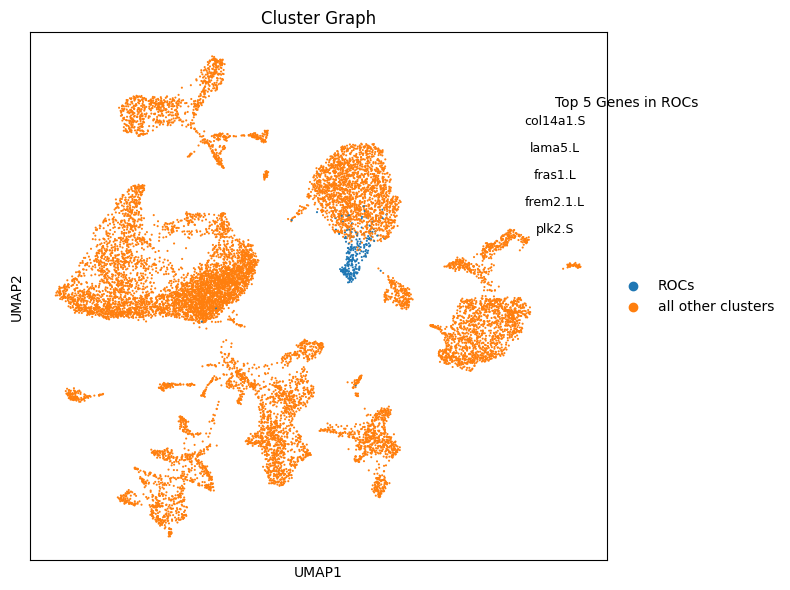

In [119]:
adata.obs['custom_colors'] = 'all other clusters'
adata.obs.loc[adata.obs['cluster'] == 'ROCs', 'custom_colors'] = 'ROCs'
top_5genes = genes_LT_Str[:5]

fig, ax = plt.subplots(figsize=(8, 6))

sc.pl.umap(adata, color='custom_colors', ax=ax, show=False)
ax.set_title('Cluster Graph')

inset_ax = fig.add_axes([0.7, 0.5, 0.2, 0.3])
inset_ax.axis('off')

inset_ax.set_title('Top 5 Genes in ROCs', fontsize=10, loc = 'left')

for i, gene in enumerate(top_genes):
    inset_ax.text(0, 1 - i * 0.15, gene, ha='center', va='top', fontsize=9)

plt.tight_layout()
plt.show()